# **Water quality**

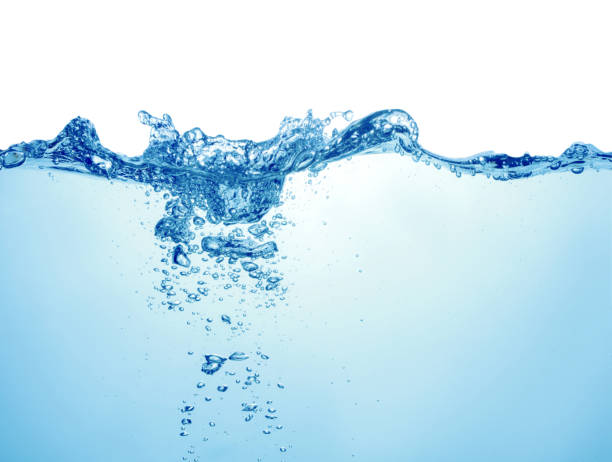

# Index

* [1.Import modules](#modules)
* [2. Read data](#read)
* [3. Data info](#info)
    * [3.1. NA Values](#navalues)
* [4. Plots](#plots)
* [5. Machine Learning Models](#models)
    * [5.1 Logistic Regression](#logistic)
    * [5.2 K-Nearest Neighnors](#knn)
    * [5.3 Decision Tree](#decisiontree)
    * [5.4 Random forest](#randomforest)
* [6. Conclusion](#conclusion)

## 1. Import modules
<a id="modules"></a>

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2. Read data
<a id="read"></a>

In [ ]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
df.head()

## 3. Data info
<a id="info"></a>

In [ ]:
print(f"This data frame has {df.shape[0]} rows and {df.shape[1]} columns.")

In [ ]:
df.info()

In [ ]:
df.describe()

### 3.1 NA Values
<a id="navalues"></a>

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna()
df.isna().sum()

If you want, you can **fill** all NA values, with the mean of each column.
<br>
*df['ph'].fillna((df['ph'].mean()), inplace=True)*

In [ ]:
print(f"After drop all NA values, we have {df.shape[0]} rows.")

## 4. Plots
<a id="plots"></a>

In [ ]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(x="Potability", data=df)
plt.xticks(ticks=[0, 1], labels=["Not Potable", "Potable"])
plt.title("Quantity of potable water")
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Potability", y="ph", data=df)
plt.title("Ph values in water potability")
plt.show()

In [ ]:
df["Potability"].value_counts()

We have more not potable values to potable, so we need to balance the data to prevent bias.

In [ ]:
not_potable = df[df['Potability']==0]
potable = df[df['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

df = pd.concat([not_potable, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

df.Potability.value_counts()

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), linewidths=.5, annot=True)
plt.show()

In [ ]:
corr = df.corr()
corr["Potability"].sort_values(ascending=False)

**Solids** has the highest correlation with *Potability*

## 5. Machine Learning Models
<a id="models"></a>

In [ ]:
# Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**X** -> All variables, except what we want to predict, to train our model
<br>
**y** -> Variable to predict

In [ ]:
X = df.drop(["Potability"], axis = 1)
y = df["Potability"]

We will use *StandardScaler* to **normalize** the data

In [ ]:
from sklearn.preprocessing import StandardScaler
normalize = StandardScaler()
features= X.columns
X[features] = normalize.fit_transform(X[features])

X[features].head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### 5.1 Logistic Regression
<a id="logistic"></a>

In [ ]:
lr_model = LogisticRegression(max_iter=120, n_jobs=25, random_state=1)
lr_model.fit(X_train, y_train)

In [ ]:
lr_predict = lr_model.predict(X_test)

In [ ]:
lr = accuracy_score(y_test, lr_predict)
print(f"Logistic Regression accuracy: {lr}")

In [ ]:
cm_lr = confusion_matrix(y_test, lr_predict)
sns.heatmap(cm_lr/np.sum(cm_lr), annot = True, fmt=  "0.2%")
plt.show()

In [ ]:
cm_lr

### 5.2 K-Nearest Neighbors
<a id="knn"></a>

In [ ]:
kn_neighbors = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
kn_neighbors.fit(X_train, y_train)

In [ ]:
kn_predict = kn_neighbors.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, kn_predict)
print(f"K-Nearest Neighbor accuracy: {kn}")

In [ ]:
cm_kn = confusion_matrix(y_test, kn_predict)
sns.heatmap(cm_kn/np.sum(cm_kn), annot = True, fmt=  "0.2%")
plt.show()

In [ ]:
cm_kn

### 5.3 Decision Tree
<a id="decisiontree"></a>

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
decision_tree.fit(X_train, y_train)

In [ ]:
dt_predict = decision_tree.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, dt_predict)
print(f"Decision tree accuracy: {dt}")

In [ ]:
cm_dt = confusion_matrix(y_test, dt_predict)
sns.heatmap(cm_dt/np.sum(cm_dt), annot=True, fmt=".2%")
plt.show()

In [ ]:
cm_dt

### 5.4 Random Forest
<a id="randomforest"></a>

In [ ]:
random_forest = RandomForestClassifier(n_estimators=110, max_depth=5, random_state=1)
random_forest.fit(X_train, y_train)

In [ ]:
rf_predict = random_forest.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, rf_predict)
print(f"Random forest accuracy: {rf}")

In [ ]:
cm_rf = confusion_matrix(y_test, rf_predict)
sns.heatmap(cm_rf/np.sum(cm_rf), annot=True, fmt=".2%")
plt.show()

In [ ]:
cm_rf

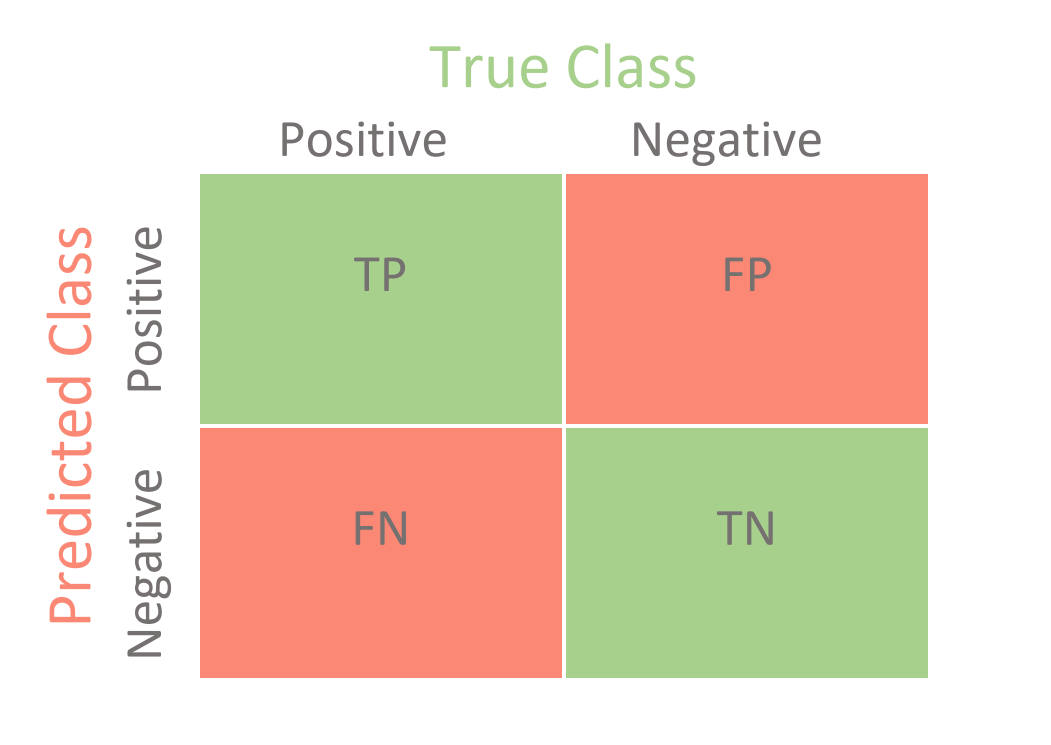

## 6. Conclusion
<a id="conclusion"></a>

In [ ]:
models = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"],
                      "Accuracy": [lr, kn, dt, rf]})
models = models.sort_values(by='Accuracy', ascending=False)
models

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=models, x="Accuracy", y="Model")
plt.title("Models accuracy score")
plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(models, x="Accuracy", y="Model", color="Model", orientation="h", title="Models accuracy score")
fig.show()

We have 2 models with respectable accuracy, almost *70%* and very close to each other.
<br>
* **KNN** (K-Neares Neighbors)
* **Random Forest**